# This notebook will mimic the plain OpenRocket setup of the subscale rocket

In [116]:
import rocketpy as rp
import numpy as np
import matplotlib.pyplot as plt

#### Helper functions for converting oz to kg and in to m

In [117]:
def oz_to_kg(oz):
    """Convert ounces to kilograms."""
    return oz * 0.0283495

def in_to_m(inches):
    """Convert inches to meters."""
    return inches * 0.0254

def kg_to_oz(kg):
    """Convert kilograms to ounces."""
    return kg * 35.274

def m_to_in(meters):
    """Convert meters to inches."""
    return meters / 0.0254

#### Defining an environment
- Testing with standard atmosphere (0 wind speed)
- Launch site coordinates: 0° longitude, 0° latitude, 0 m elevation


Gravity Details

Acceleration of gravity at surface level:    9.7803 m/s²
Acceleration of gravity at  80.000 km (ASL): 9.5379 m/s²


Launch Site Details

Launch Site Latitude: 0.00000°
Launch Site Longitude: 0.00000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type: standard_atmosphere
standard_atmosphere Maximum Height: 80.000 km

Surface Atmospheric Conditions

Surface Wind Speed: 0.00 m/s
Surface Wind Direction: 0.00°
Surface Wind Heading: 0.00°
Surface Pressure: 1013.25 hPa
Surface Temperature: 288.15 K
Surface Air Density: 1.225 kg/m³
Surface Speed of Sound: 340.29 m/s


Earth Model Details

Earth Radius at Launch site: 6378.14 km
Semi-major Axis: 6378.14 km
Semi-minor Axis: 6356.75 km
Flattening: 0.0034


Atmospheric Model Plots



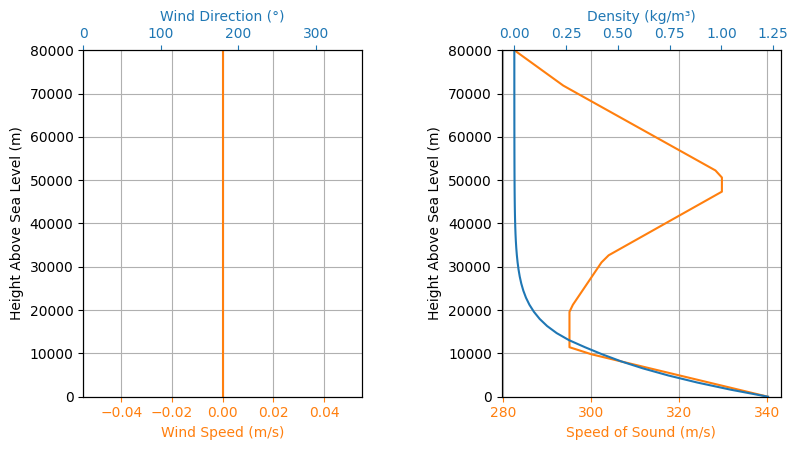

In [118]:
test_long = 0
test_lat = 0
test_elevation = 0

# print(test_long, test_lat)

env = rp.Environment(latitude=test_lat, longitude=test_long, elevation=test_elevation)
env.set_atmospheric_model(type='standard_atmosphere')

env.info()

#### Defining a solid motor

Motor Details
Total Burning Time: 2.563 s
Total Propellant Mass: 0.381 kg
Structural Mass Ratio: 0.407
Average Propellant Exhaust Velocity: 1841.130 m/s
Average Thrust: 273.691 N
Maximum Thrust: 367.585 N at 0.007 s after ignition.
Total Impulse: 701.470 Ns



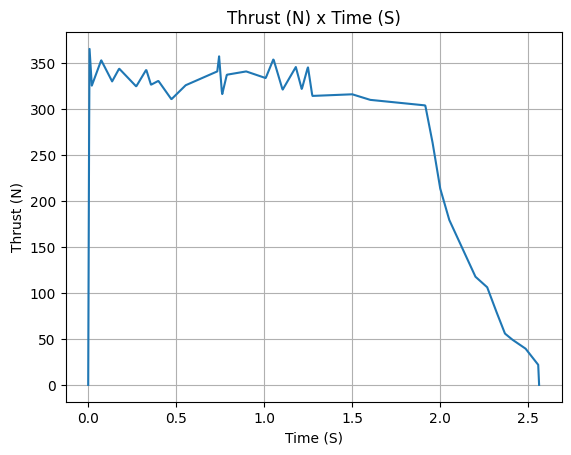

In [119]:
HPJ270 = rp.motors.GenericMotor.load_from_eng_file('AeroTech_HP-J270W.eng')
HPJ270.info()

#### Defining a rocket

In [120]:
subscale = rp.Rocket(
    radius=in_to_m(4.0), # m
    mass=oz_to_kg(90.2), # kg
    inertia=(0.99, 0.99, 0.006), # kg*m^2
    power_off_drag='thrust_curve.csv',
    power_on_drag='thrust_curve.csv',
    center_of_mass_without_motor=in_to_m(45.425), # m
    coordinate_system_orientation='tail_to_nose'
)

subscale.info()


Inertia Details

Rocket Mass: 2.557 kg (without motor)
Rocket Dry Mass: 2.557 kg (with unloaded motor)
Rocket Loaded Mass: 2.557 kg
Rocket Structural Mass Ratio: 1.000
Rocket Inertia (with unloaded motor) 11: 0.990 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.990 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.006 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.1016 m
Rocket Frontal Area: 0.032429 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 1.154 m
Rocket Center of Dry Mass - Center of Propellant Mass: 1.154 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.000 m


Aerodynamics Lift Coefficient Derivatives


Center of Pressure


Stability

Center of Mass position (time=0): 1.154 m
Center of Pressure position (time=0): 0.000 m

#### Adding the motor to the rocket

In [121]:
subscale.add_motor(
    motor=HPJ270,
    position=in_to_m(1), # m
)

#### Adding aerodynamic surfaces to the rocket

In [122]:
nose_cone = subscale.add_nose(
    length=in_to_m(16.0), # m
    kind='Von Karman',
    position=in_to_m(81), # m
)

fin_set = subscale.add_free_form_fins(
    n=3,
    shape_points=[
        (in_to_m(0.0), in_to_m(0.0)),
        (in_to_m(3.752), in_to_m(5.625)),
        (in_to_m(8.249), in_to_m(5.625)),
        (in_to_m(12), in_to_m(0))
    ],
    position=in_to_m(2.6 + 12), # m
)

tail = subscale.add_tail(
    top_radius=in_to_m(4.0), # m
    bottom_radius=in_to_m(3.99), # m
    length=in_to_m(1), # m
    position=in_to_m(1), # m
)

#### Drawing rocket

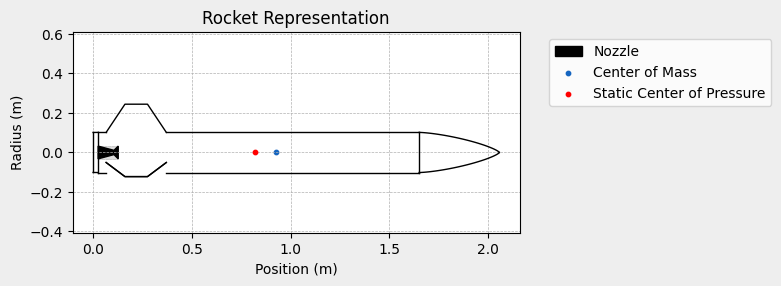

In [123]:
subscale.draw()

#### Checking stability of rocket

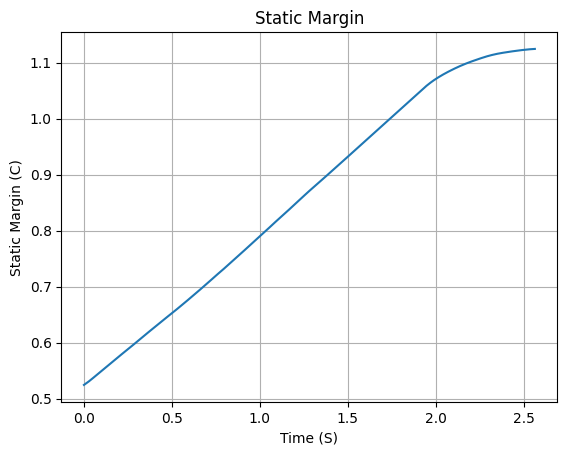

In [124]:
subscale.plots.static_margin()

#### Test flight

In [125]:
test_flight = rp.Flight(
    rocket=subscale,
    environment=env,
    rail_length=in_to_m(40), # m
    inclination=90, # degrees
    heading=90, # degrees
)

In [126]:
test_flight.prints.initial_conditions()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 0.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.707 | e1: 0.000 | e2: 0.000 | e3: -0.707
Euler Angles - Spin φ : -225.00° | Nutation θ: 0.00° | Precession ψ: 135.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 0.525 c


In [129]:
test_flight.prints.burn_out_conditions()
test_flight.prints.apogee_conditions()


Burn out State

Burn out time: 2.563 s
Altitude at burn out: 223.018 m (ASL) | 223.018 m (AGL)
Rocket speed at burn out: 105.416 m/s
Freestream velocity at burn out: 105.416 m/s
Mach Number at burn out: 0.311
Kinetic energy at burn out: 1.566e+04 J

Apogee State

Apogee Time: 8.094 s
Apogee Altitude: 425.304 m (ASL) | 425.304 m (AGL)
Apogee Freestream Speed: 0.001 m/s
Apogee X position: 0.000 m
Apogee Y position: 0.000 m
Apogee latitude: 0.0000000°
Apogee longitude: 0.0000000°


In [130]:
test_flight.prints.maximum_values()


Maximum Values

Maximum Speed: 336.967 m/s at 14.88 s
Maximum Mach Number: 0.990 Mach at 14.88 s
Maximum Reynolds Number: 4.688e+06 at 14.88 s
Maximum Dynamic Pressure: 6.955e+04 Pa at 14.88 s
Maximum Acceleration During Motor Burn: 105.136 m/s² at 0.01 s
Maximum Gs During Motor Burn: 10.721 g at 0.01 s
Maximum Acceleration After Motor Burn: 90.152 m/s² at 0.39 s
Maximum Gs After Motor Burn: 9.193 Gs at 0.39 s
Maximum Stability Margin: 1.231 c at 14.77 s
